<a href="https://colab.research.google.com/github/ghost5053/clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


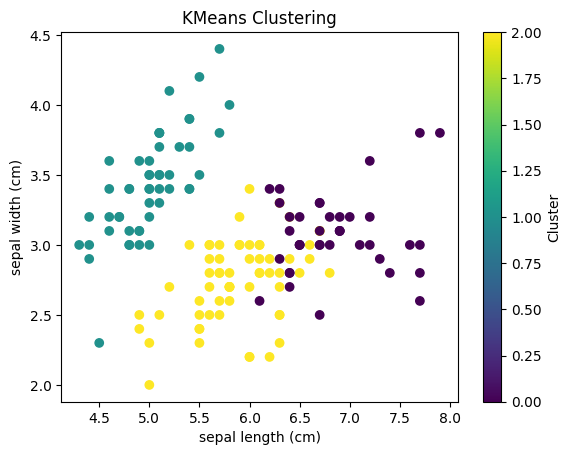

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Visualization
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['Cluster'], cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Cluster')
plt.show()


**KMeans** is a centroid-based clustering algorithm that divides data into k clusters. It works iteratively: Assigns each data point to the nearest centroid. Updates centroids as the mean of the points in each cluster. Stops when centroids no longer change or a maximum number of iterations is reached.
###Suitability for the Iris Dataset:
The Iris dataset has well-separated clusters corresponding to different species. KMeans works well with numeric data and can handle this type of structured data efficiently.

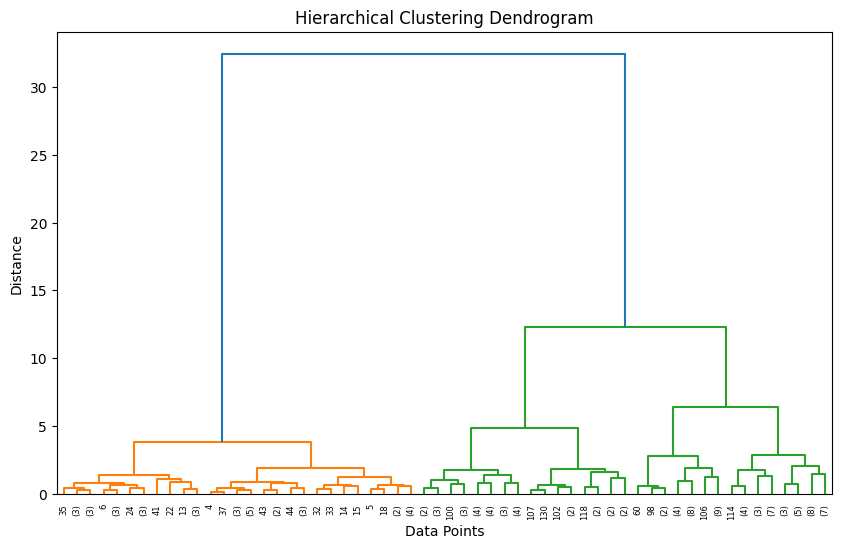

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
data['HCluster'] = hierarchical.fit_predict(data)

# Dendrogram
linkage_matrix = linkage(data.iloc[:, :-2], method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Hierarchical clustering** builds a hierarchy of clusters using a tree-like structure called a dendrogram.

Two main types:

Agglomerative: Starts with individual points and merges them into clusters.


Divisive: Starts with a single cluster and splits it into smaller clusters.
It does not require specifying the number of clusters upfront, though it can be extracted from the dendrogram.

###Suitability for the Iris Dataset:

The hierarchical approach helps visualize the cluster structure and inter-cluster relationships.
It is useful when the number of clusters is not pre-determined.